In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use('fivethirtyeight')

from get_data import create_dataframe

sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

username = "'Tiago'"

df = create_dataframe(username)

categories = df['Category'].unique()

df_categories = list()
for category in categories:
    df_category = df.loc[df['Category'] == category].copy()
    try:
        df_category['Value'] = df_category['Value'].astype('float64')
        print(df_category['Category'].iloc[0], ' - Float')
    except ValueError:
        print(df_category['Category'].iloc[0], ' - str')
        pass 
    df_categories.append(df_category)

Alimentação  - Float
Casa  - Float
Compras  - Float
Entretenimento  - Float
Gastos  - Float
Gym  - str
Livros  - Float
Outros  - Float
Review  - str
Tarot  - Float
Transporte  - Float
Trotinete  - Float


In [7]:
category = 'Transporte'
range_begin = '2023-01-01'
range_end = '2023-01-31'

df_category = df_categories[categories.tolist().index(category)]
df_category = df_category.loc[(df_category['Date'] >= range_begin) & (df_category['Date'] <= range_end)]

types = df_category['Type'].unique()

print('Category:', category, 'between', range_begin,'and', range_end,'\n')
total_sum = []
for each_type in types:
    df_type = df_category.loc[df_category['Type'] == each_type]

    type_freq = df_type.count()[0]
    type_sum = sum(df_type['Value'])
    total_sum.append(type_sum)

    print(type_freq, '-', each_type + ': %.2f' % type_sum)

print('\nTotal: %.2f' % sum(total_sum))

Category: Transporte between 2023-01-01 and 2023-01-31 

18 - Autocarro: 19.00
3 - Gira: 3.00
3 - Metro: 3.00
11 - Uber: 65.38

Total: 90.38


In [8]:
category = 'Trotinete'
range_begin = '2023-01-01'
range_end = '2023-04-30'

df_category = df_categories[categories.tolist().index(category)]
df_category = df_category.loc[(df_category['Date'] >= range_begin) & (df_category['Date'] <= range_end)]

types = df_category['Type'].unique()

print('Category:', category, 'between', range_begin,'and', range_end,'\n')
print('Averages')
total_sum = []
for each_type in types:
    df_type = df_category.loc[df_category['Type'] == each_type]

    type_freq = df_type.count()[0]
    type_sum = sum(df_type['Value'])
    total_sum.append(type_sum)

    print(type_freq, '-', each_type + ': %.2f' % (type_sum/type_freq))


Category: Trotinete between 2023-01-01 and 2023-04-30 

Averages
7 - Bateria: 22.43
7 - Distancia: 4.35
7 - Velocidade media: 20.66


In [9]:
df_trotinete = df_category.copy()

df_trotinete['Date'] = pd.to_datetime(df_trotinete['Date'])
df_trotinete.set_index('Date', inplace=True)

df_trotinete = df_trotinete.pivot(columns='Type', values='Value')
df_trotinete.columns = ['Battery', 'Distance', 'Speed']

df_trotinete['Battery'] = df_trotinete['Battery'].astype(float)
df_trotinete['Distance'] = df_trotinete['Distance'].astype(float)
df_trotinete['Speed'] = df_trotinete['Speed'].astype(float)

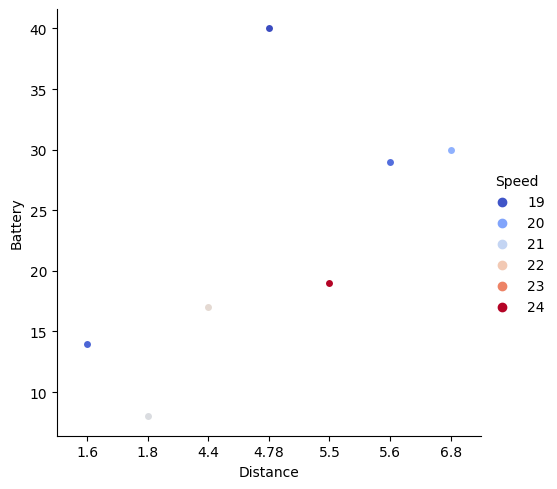

In [18]:
sns.catplot(data=df_trotinete, x='Distance', y='Battery', hue='Speed', kind="swarm",palette=sns.color_palette("coolwarm", as_cmap=True))

<AxesSubplot: xlabel='Distance', ylabel='Count'>

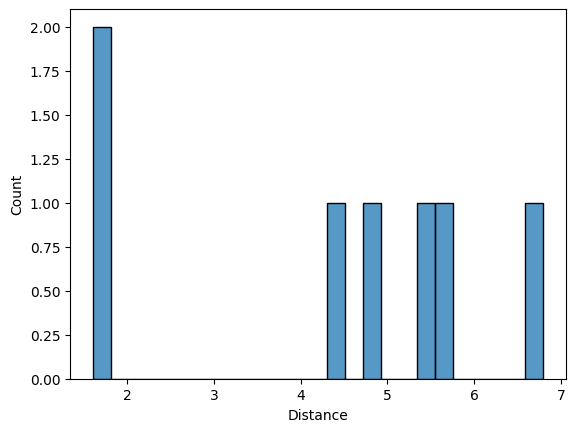

In [31]:
sns.histplot(data=df_trotinete,x='Distance',bins=25)

<AxesSubplot: xlabel='Distance', ylabel='Battery'>

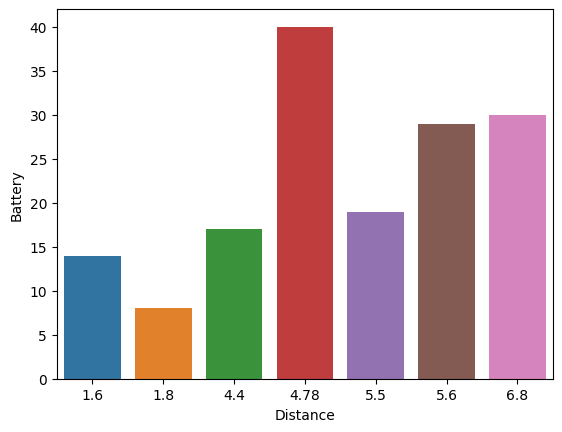

In [32]:
sns.barplot(data=df_trotinete, x='Distance', y='Battery')